In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


(array([ 549.,  342.]), array([ 0. ,  0.5,  1. ]), <a list of 2 Patch objects>)

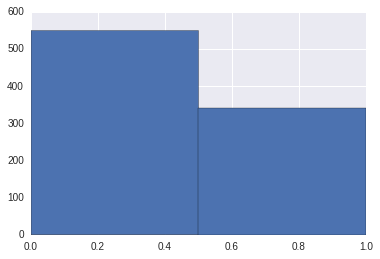

In [4]:
print train['Survived'].describe()
plt.hist(train['Survived'], bins=2)

Question:
What factors made people more likely to survive?

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


Histogram:
Axes(0.125,0.125;0.775x0.775)


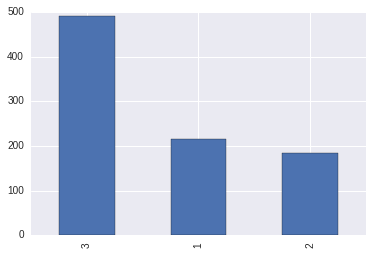

In [5]:
print train['Pclass'].describe()
print '\n'

print 'Histogram:'
print train.Pclass.value_counts().plot(kind='bar')

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Axes(0.125,0.125;0.775x0.775)


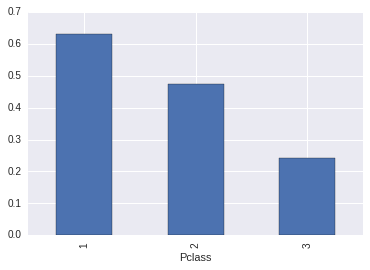

In [6]:
groupby_pclass = train.groupby(by='Pclass')
print groupby_pclass.count()['Survived']
print groupby_pclass.mean()['Survived'].plot(kind='bar')

Looks like first class passengers were most likely to survive, perhaps they were given preference for lifeboats

In [7]:
print train['Name'].describe()
dummy = train.pop('Name')

count                           891
unique                          891
top       Graham, Mr. George Edward
freq                              1
Name: Name, dtype: object


I'll drop 'name' column, looks like it won't provide much information

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Histogram:
Axes(0.125,0.125;0.775x0.775)


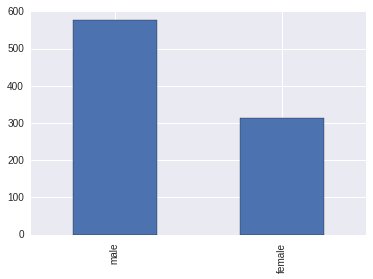

In [8]:
print train['Sex'].describe()
print '\n'

print 'Histogram:'
print train.Sex.value_counts().plot(kind='bar')

Sex
female    314
male      577
Name: Survived, dtype: int64
Axes(0.125,0.125;0.775x0.775)


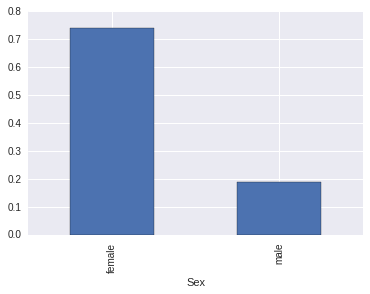

In [9]:
groupby_sex = train.groupby(by='Sex')
print groupby_sex.count()['Survived']
print groupby_sex.mean()['Survived'].plot(kind='bar')

Women were more likely to survive, probably they were evacuated first along with kids

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Histogram:
(array([  64.,  115.,  230.,  155.,   86.,   42.,   17.,    5.]), array([  0.42  ,  10.3675,  20.315 ,  30.2625,  40.21  ,  50.1575,
        60.105 ,  70.0525,  80.    ]), <a list of 8 Patch objects>)


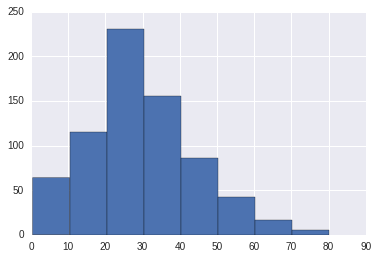

In [10]:
print train['Age'].describe()
print '\n'

print 'Histogram:'
print plt.hist(train['Age'].dropna(), bins=8)

In [11]:
def map_ages(age):
    if (age >= 0) and (age <= 10):
        return '0-10'
    if (age > 10) and (age <= 20):
        return '10-20'
    if (age > 20) and (age <= 30):
        return '20-30'
    if (age > 30) and (age <= 40):
        return '30-40'
    if (age > 40) and (age <= 50):
        return '40-50'
    if (age > 50) and (age <= 60):
        return '50-60'
    if (age > 60) and (age <= 70):
        return '60-70'
    if (age > 70):
        return '70+'
    else:
        return 'N/A'

In [12]:
train['Age'] = train['Age'].apply(map_ages)

Age
0-10      64
10-20    115
20-30    230
30-40    155
40-50     86
50-60     42
60-70     17
70+        5
N/A      177
Name: Survived, dtype: int64
Axes(0.125,0.125;0.775x0.775)


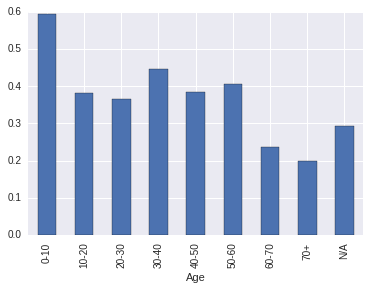

In [13]:
groupby_age = train.groupby(by='Age')
print groupby_age.count()['Survived']
print groupby_age.mean()['Survived'].plot(kind='bar')

Looks like kids (ages 0-10) were more likely to survive (probably because of 'women and children first' rule) and seniors (60+) were less likely to survive

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
/n
Histogram:
Axes(0.125,0.125;0.775x0.775)


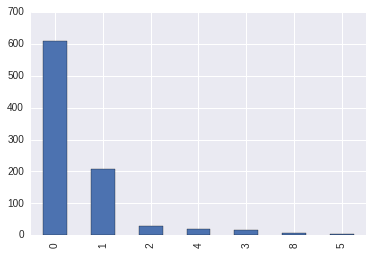

In [14]:
print train['SibSp'].describe()
print '/n'

print 'Histogram:'
print train.SibSp.value_counts().plot(kind='bar')

In [15]:
def had_sibsp(sibsp):
    if (sibsp == 0):
        return 'no'
    else:
        return 'yes'

In [16]:
train['SibSp'] = train['SibSp'].apply(had_sibsp)

SibSp
no     608
yes    283
Name: Survived, dtype: int64
Axes(0.125,0.125;0.775x0.775)


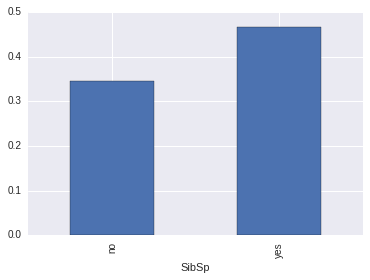

In [17]:
groupby_sibsp = train.groupby(by='SibSp')
print groupby_sibsp.count()['Survived']
print groupby_sibsp.mean()['Survived'].plot(kind='bar')

Looks like passengers with siblings and spouses were more likely to survive - perhaps some preference were given to families

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
/n
Histogram:
Axes(0.125,0.125;0.775x0.775)


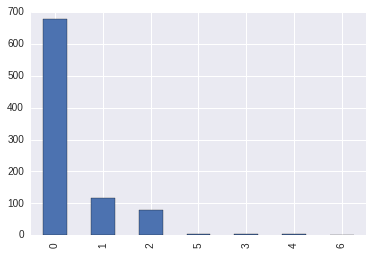

In [18]:
print train['Parch'].describe()
print '/n'

print 'Histogram:'
print train.Parch.value_counts().plot(kind='bar')

In [19]:
def had_parch(parch):
    if (parch == 0):
        return 'no'
    else:
        return 'yes'

In [20]:
train['Parch'] = train['Parch'].apply(had_parch)

Parch
no     678
yes    213
Name: Survived, dtype: int64
Axes(0.125,0.125;0.775x0.775)


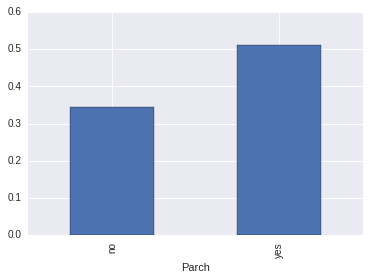

In [21]:
groupby_parch = train.groupby(by='Parch')
print groupby_parch.count()['Survived']
print groupby_parch.mean()['Survived'].plot(kind='bar')

Looks like passengers and children were more likely to survive. Though, perhaps, those passengers were children who were more likely to survive either way

In [22]:
print train['Ticket'].describe()
train.pop('Ticket')

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object


0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

I'll drop ticket id, not much information here

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


Histogram:
(array([ 496.,  191.,   45.,   45.,   48.,   13.,   11.,   11.,    9.,
          2.,    0.,    0.,    5.,    4.,    2.,    6.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    3.]), array([   0.     ,   17.07764,   34.15528,   51.23292,   68.31056,
         85.3882 ,  102.46584,  119.54348,  136.62112,  153.69876,
        170.7764 ,  187.85404,  204.93168,  222.00932,  239.08696,
        256.1646 ,  273.24224,  290.31988,  307.39752,  324.47516,
        341.5528 ,  358.63044,  375.70808,  392.78572,  409.86336,
        426.941  ,  444.01864,  461.09628,  478.17392,  495.25156,
        512.3292 ]), <a list of 30 Patch objects>)


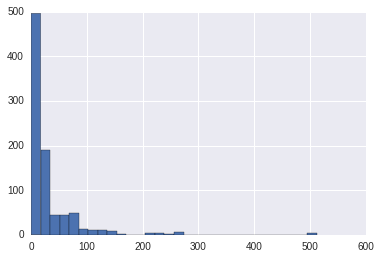

In [23]:
print train['Fare'].describe()
print '\n'

print 'Histogram:'
print plt.hist(train['Fare'], bins=30)

In [24]:
def map_fare(fare):
    if (fare <= 50):
        return 'cheap'
    else:
        return 'expensive'

In [25]:
train['Fare'] = train['Fare'].apply(map_fare)

Fare
cheap        731
expensive    160
Name: Survived, dtype: int64
Axes(0.125,0.125;0.775x0.775)


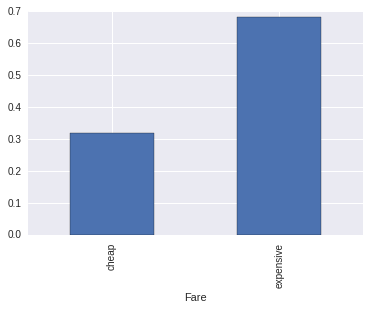

In [26]:
groupby_fare = train.groupby(by='Fare')
print groupby_fare.count()['Survived']
print groupby_fare.mean()['Survived'].plot(kind='bar')

Passengers with expensive tickets were far more likely to survive (they were 1st and 2nd class passengers, perhaps)

In [27]:
print train['Cabin'].describe()
train.pop('Cabin')

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object


0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

I'll drop cabin id from analysis

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


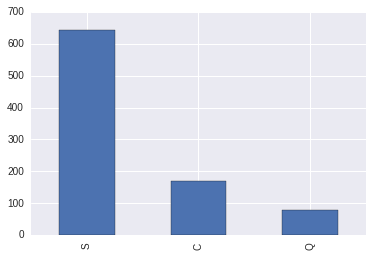

In [28]:
print train['Embarked'].describe()
train.Embarked.value_counts().plot(kind='bar')

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64
Axes(0.125,0.125;0.775x0.775)


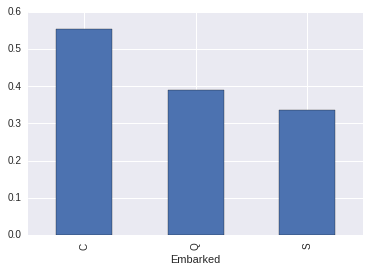

In [29]:
groupby_embarked = train.groupby(by='Embarked')
print groupby_embarked.count()['Survived']
print groupby_embarked.mean()['Survived'].plot(kind='bar')

Passengers embarked on 'C' were more likely to survive (more 1st class passengers embaked there?)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,20-30,yes,no,cheap,S
1,2,1,1,female,30-40,yes,no,expensive,C
2,3,1,3,female,20-30,no,no,cheap,S
3,4,1,1,female,30-40,yes,no,expensive,S
4,5,0,3,male,30-40,no,no,cheap,S


Let's do 2 variable exploration

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64
Axes(0.125,0.125;0.775x0.775)


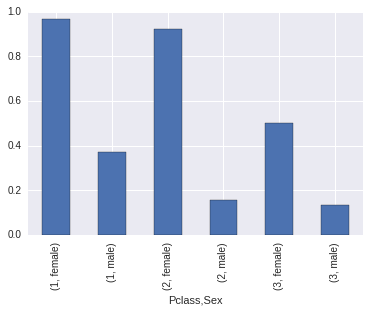

In [32]:
groupby_2 = train.groupby(by=['Pclass', 'Sex'])
print groupby_2.count()['Survived']
print groupby_2.mean()['Survived'].plot(kind='bar')

Indeed, looks like sex played a huge role in determining survival. We see that even 3rd class females were more likely to survive than 1st class males